In [1]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt

In [111]:
mfile = "../8_embryo/results/blastocyst_counts.genes.gene_name.total.tsv"
# mfile = "results/blastocyst_counts.genes.gene_name.total.tsv"
matrix = pd.read_csv(mfile, sep="\t", header=0, index_col=0)
adata = anndata.AnnData(matrix.T)
adata

AnnData object with n_obs × n_vars = 2661 × 29041

In [114]:
# adata.var_names_make_unique()

/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


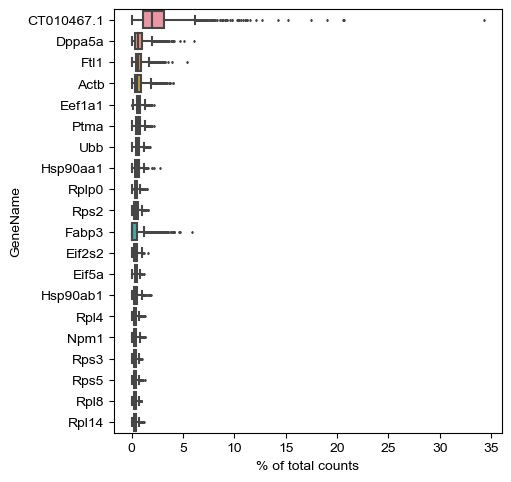

In [115]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [116]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [117]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

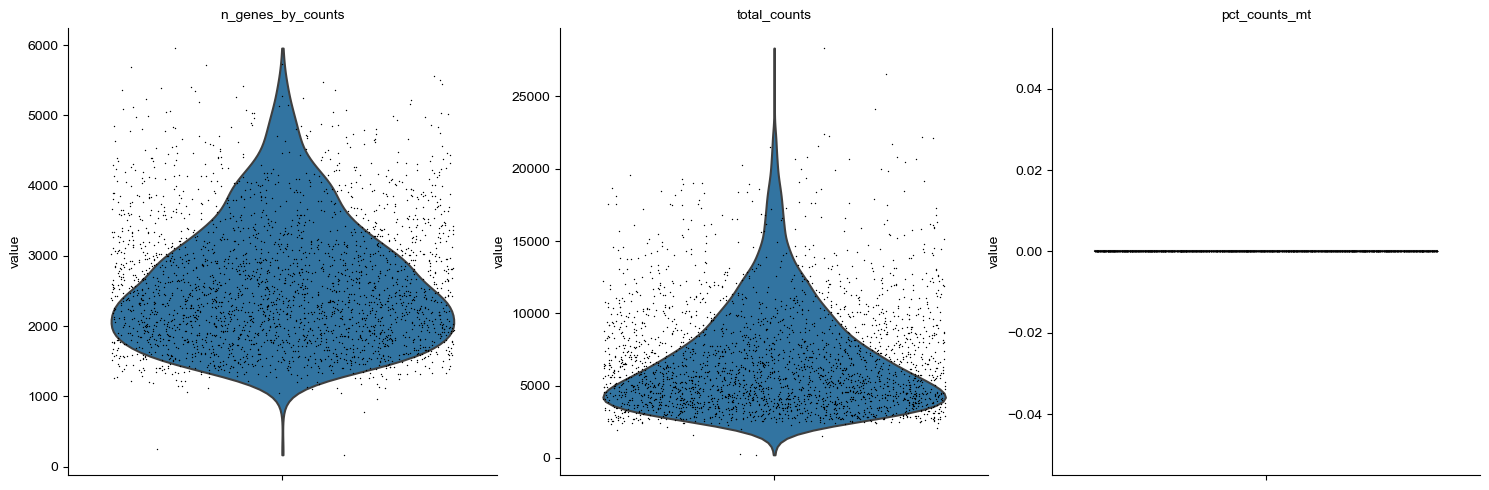

In [118]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

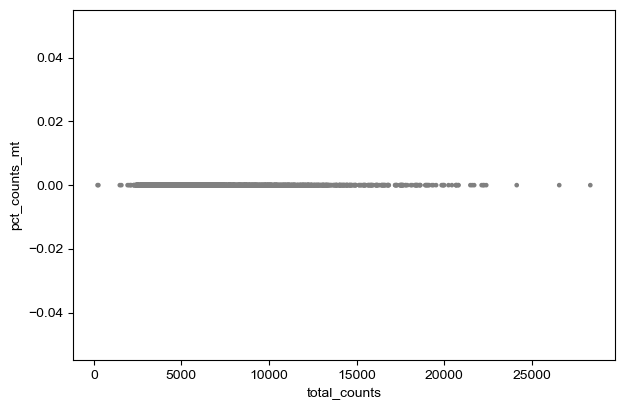

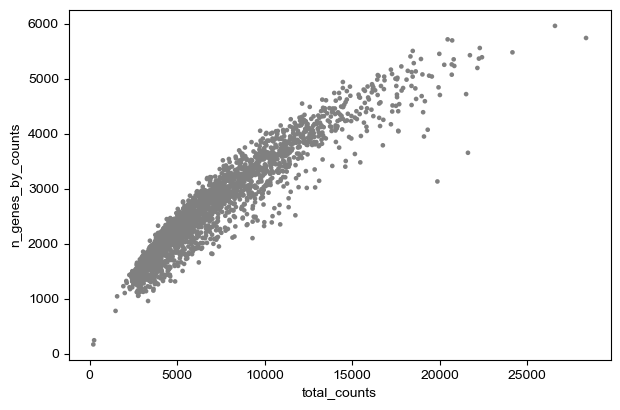

In [119]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [120]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [121]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [122]:
sc.pp.log1p(adata)

In [123]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

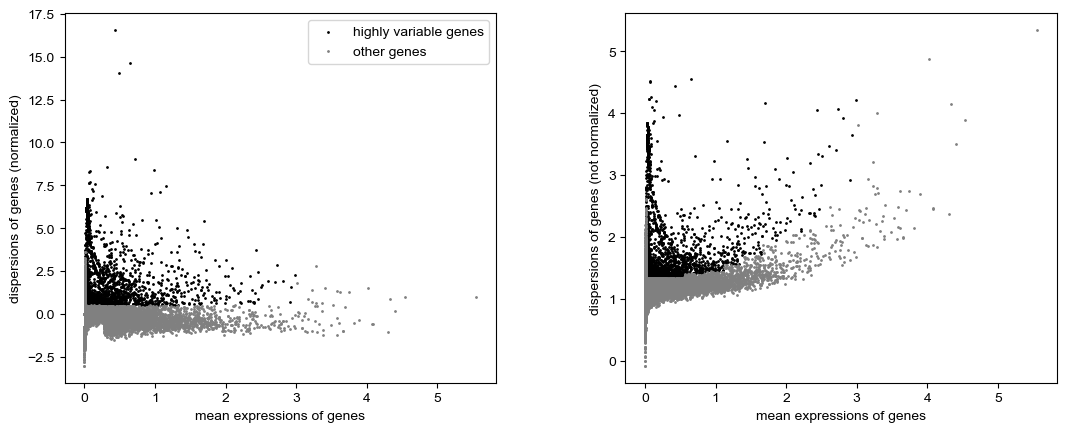

In [124]:
sc.pl.highly_variable_genes(adata)

In [125]:
adata.raw = adata

In [126]:
adata = adata[:, adata.var.highly_variable]

In [127]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [128]:
sc.pp.scale(adata, max_value=10)

In [129]:
sc.tl.pca(adata, svd_solver='arpack')

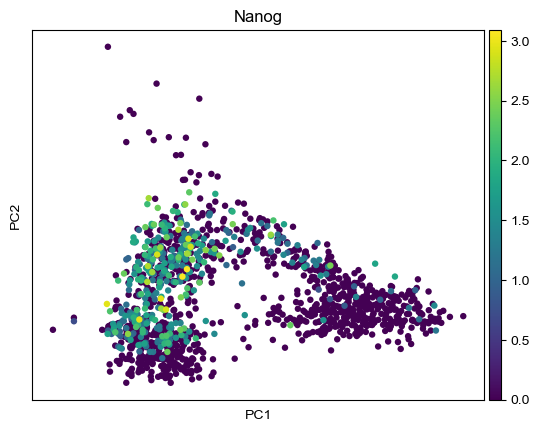

In [130]:
sc.pl.pca(adata, color='Nanog')

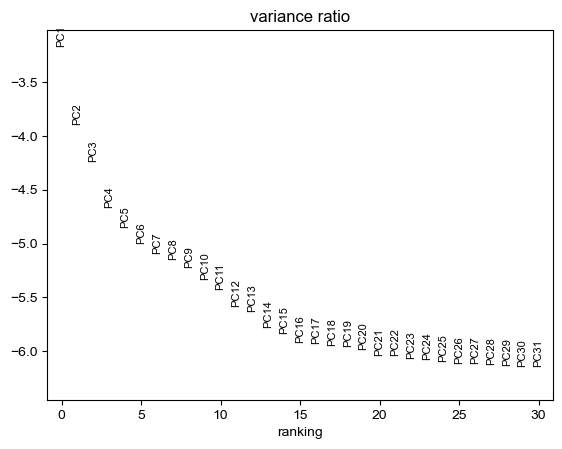

In [131]:
sc.pl.pca_variance_ratio(adata, log=True)

In [132]:
adata

AnnData object with n_obs × n_vars = 1399 × 2446
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [133]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [134]:
sc.tl.umap(adata)

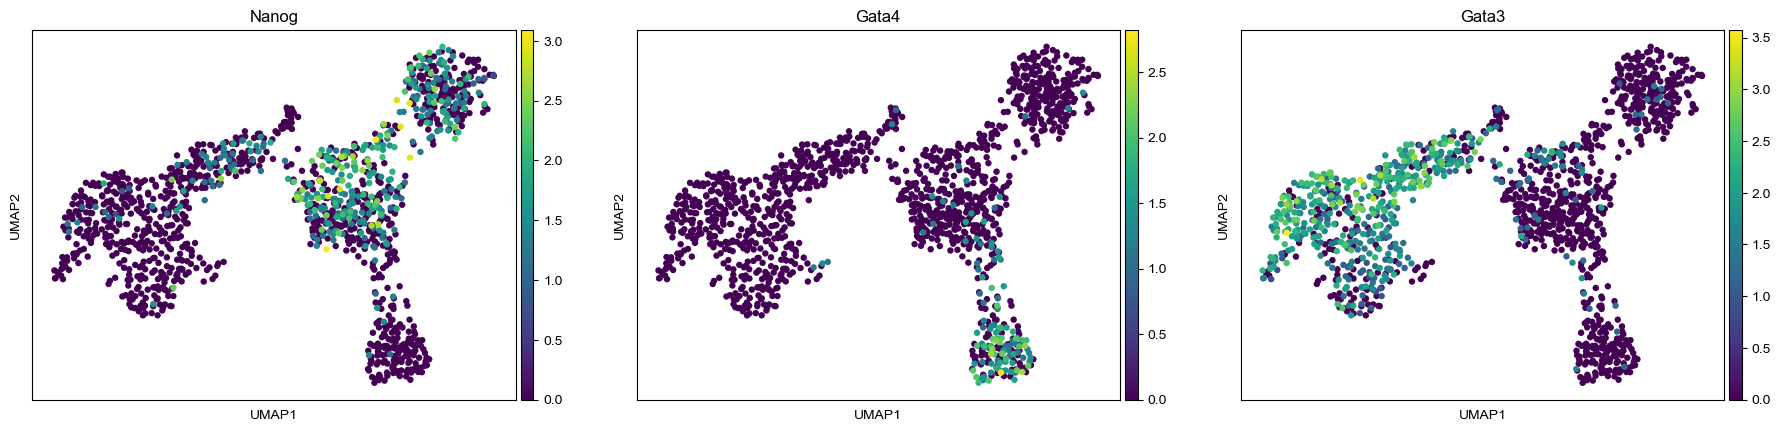

In [135]:
sc.pl.umap(adata, color=['Nanog', 'Gata4', 'Gata3'])

In [136]:
# sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

In [137]:
sc.tl.leiden(adata)

/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


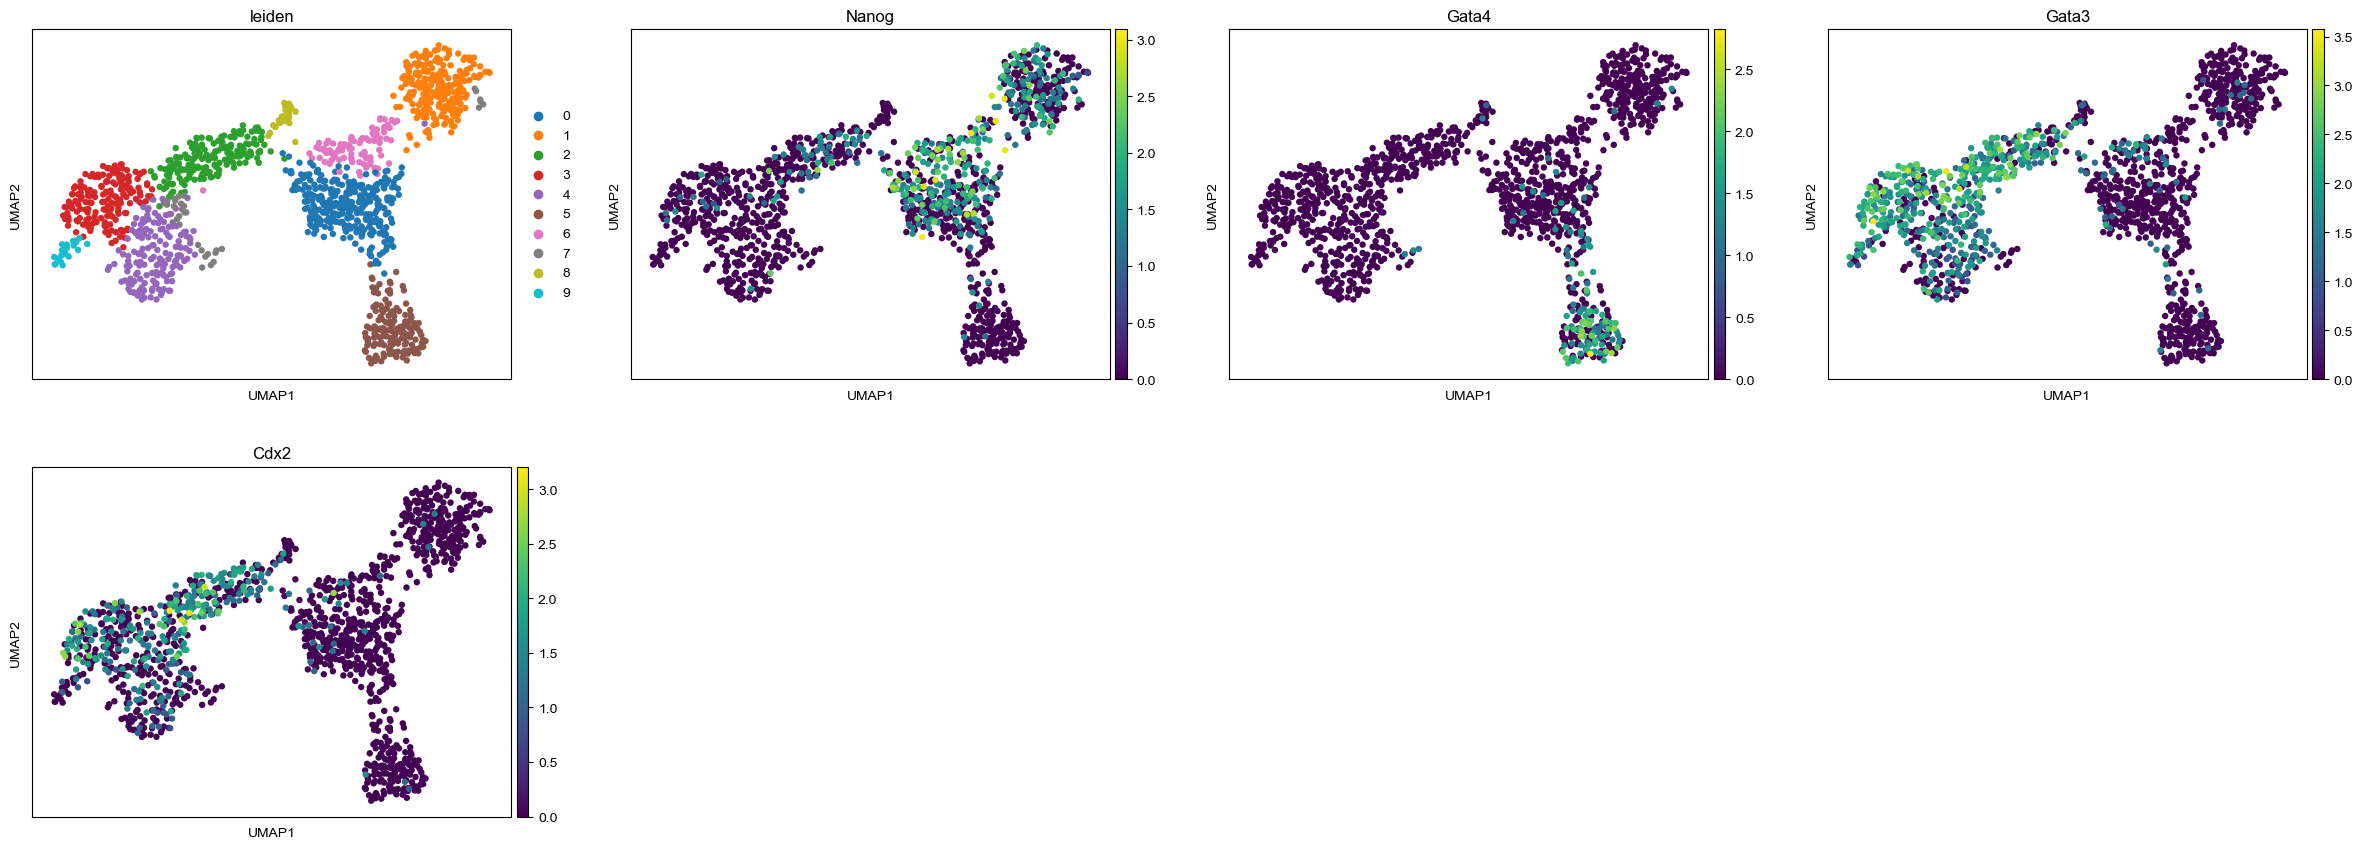

In [143]:
sc.pl.umap(adata, color=['leiden', 'Nanog', 'Gata4', 'Gata3', "Cdx2"], use_raw=True)

In [180]:
wangxiao_g1s = ['BCL2L1', 'CDC6', 'DSCC1', 'DTL', 'MCM5', 'UNG', 'SNN', 'FEN1',
                'GINS2', 'GMNN', 'MCM2', 'MCM4', 'MCM6', 'PCNA', 'PRIM1', 'RRM1', 'TYMS', 'UHRF1',
                'CDCA7']
wangxiao_g2m = ['TOP2A', 'TPX2', 'UBE2C', 'HJURP', 'BIRC5', 'CCNB2', 'CDCA2',
                'CKAP5', 'CKS1B', 'CKS2', 'HMGB2', 'NCAPD2', 'NDC80', 'NUF2', 'TACC3', 'TMPO',
                'MKI67', 'CENPF']
science_g1s = ['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL',
               'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP',
               'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN',
               'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8']
science_g2m = ['HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2', 'CKS1B', 'MKI67',
               'TMPO', 'CENPF', 'TACC3', 'FAM64A', 'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E',
               'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'HN1', 'CDC20', 'TTK', 'CDC25C', 'KIF2C', 'RANGAP1',
               'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2', 'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5',
               'CENPE', 'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA']

def change(genes):
    for g in genes:
        yield g[0].upper() + g[1:].lower()
        
wangxiao_g1s = list(change(wangxiao_g1s))
wangxiao_g2m = list(change(wangxiao_g2m))
science_g1s = list(change(science_g1s))
science_g2m = list(change(science_g2m))

s_genes = science_g1s
g2m_genes = science_g2m
print(len(s_genes), len(g2m_genes))

43 54


In [ ]:
mfile = "../8_embryo/results/blastocyst_counts.genes.gene_name.total.tsv"
# mfile = "results/blastocyst_counts.genes.gene_name.total.tsv"
matrix = pd.read_csv(mfile, sep="\t", header=0, index_col=0)

In [160]:
adata = anndata.AnnData(matrix.T)
adata

AnnData object with n_obs × n_vars = 2661 × 29041

In [161]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [189]:
s_genes = list(filter(lambda x: x in adata.var_names, s_genes))
g2m_genes = list(filter(lambda x: x in adata.var_names, g2m_genes))
cell_cycle_genes = s_genes + g2m_genes
print(len(s_genes), len(g2m_genes))

42 52


In [163]:
sc.pp.log1p(adata)
sc.pp.scale(adata)

In [164]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


... storing 'phase' as categorical
/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


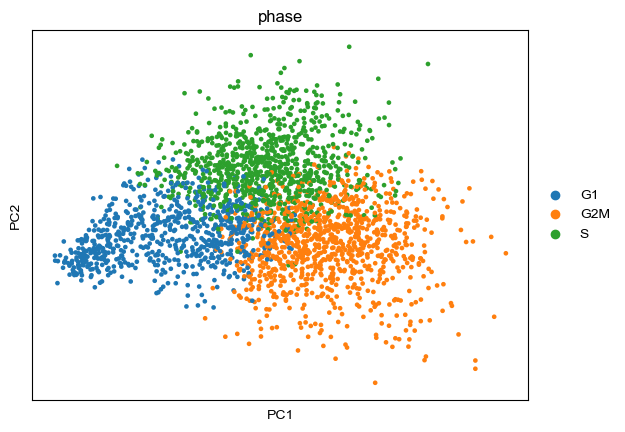

In [185]:
adata_cc_genes = adata[:, s_genes + g2m_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [187]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
sc.pp.scale(adata)

... storing 'phase' as categorical


/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


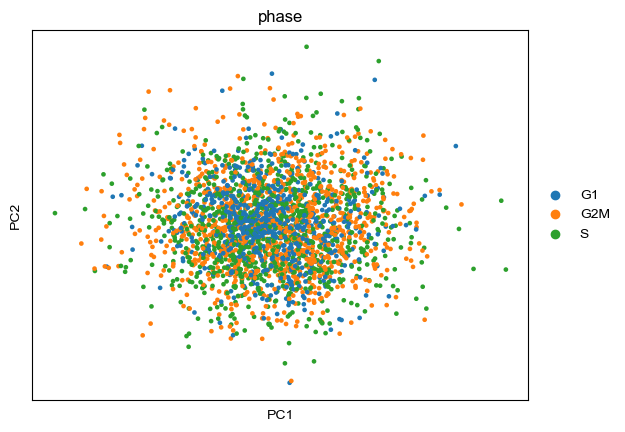

In [190]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [191]:
import dynamo as dyn


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/home/chenzonggui/miniconda3/envs/scanpy/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [196]:
adata.obs.to_csv("results/obs.tsv", sep="\t")

# cell cycle of blastocyst

In [193]:
mtx1 = pd.read_csv("../8_embryo/results/blastocyst_counts.genes.gene_name.total.tsv", sep="\t", header=0, index_col=0)
mtx2 = pd.read_csv("../8_embryo/results/blastocyst_counts.genes.gene_name.nascent.tsv", sep="\t", header=0, index_col=0)

In [347]:
adata = anndata.AnnData(mtx1.T)
adata.layers["total"] = mtx1.T
adata.layers["new"] = mtx2.T

In [348]:
meta = pd.read_csv("../8_embryo/results/seurat_transcripts/metadata_and_celltype.consistent_celltype.tsv", sep="\t")
meta.index = meta["Cell"]
adata.obs = adata.obs.merge(meta, left_index=True, right_index=True, how="left")
cc = pd.read_csv("results/obs.tsv", sep="\t", index_col=0)
adata.obs = adata.obs.merge(cc[["phase"]], left_index=True, right_index=True, how="left")

In [349]:
xs = ["muralTE", "poralTE", "EPI", "PE"]
xs = ["PE"]
adata = adata[[x in xs for x in adata.obs["CellType"]], :]

In [350]:
adata = adata[(adata.obs["s4U"] == 400) & (adata.obs["Time"] == 3) & (adata.obs["ActD"].isna()), :]

In [351]:
adata.obs["time"] = 3
# adata.obs["group"] = adata.obs["phase"]
adata.obs["group"] = adata.obs["CellType"]

In [352]:
# adata = adata[:, cell_cycle_genes]

In [353]:
Counter(adata.obs["phase"])

Counter({'G2M': 65, 'S': 50, 'G1': 24})

In [342]:
dyn.pp.recipe_monocle(adata, tkey="time")

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> 
Dynamo detects your labelin

In [343]:
dyn.tl.dynamics(adata, model='stochastic', cores=3, NTR_vel=True)
dyn.tl.reduceDimension(adata)
dyn.tl.leiden(adata)
dyn.tl.hdbscan(adata)
dyn.tl.louvain(adata)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [2.9521s]
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [5.1928s]
|-----> accessing adj_matrix_key=distances built from args for clustering...
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Obje

In [344]:
dyn.tl.cell_velocities(adata, calc_rnd_vel=True)
dyn.vf.VectorField(adata, basis='umap')

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [0.6456s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.1658s]
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [0.6797s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.1742s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional gri

|-----------> plotting with basis key=X_umap
|-----------> skip filtering phase by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap_rnd
|-----------> skip filtering phase by stack threshold when stacking color because it is not a numeric type


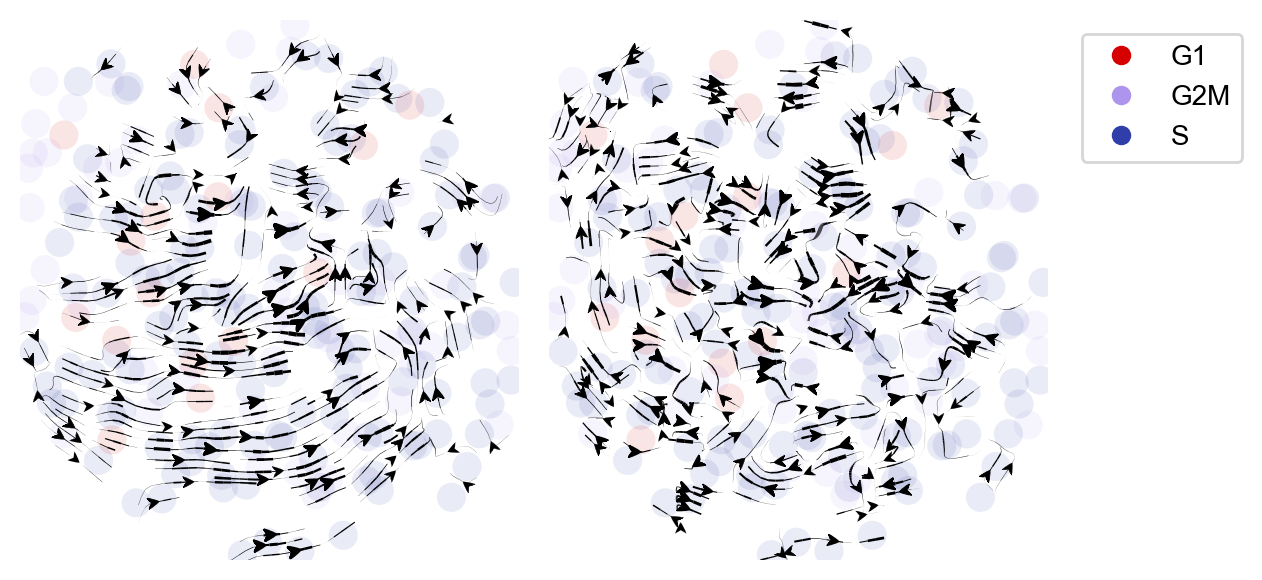

In [345]:
# color = "leiden"
color = "louvain"
color = "phase"
# color = "cell_cycle_phase"
pointsize = 0.1
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3))
dyn.pl.streamline_plot(adata, 
                       color=color, 
                       pointsize=pointsize, 
                       #color_key=color_key,
                       basis='umap', ax=axs[0], show_legend=False, save_show_or_return='return')
dyn.pl.streamline_plot(adata, 
                       color=color, 
                       pointsize=pointsize,
                       #color_key=color_key,
                       basis='umap_rnd', ax=axs[1], show_legend='right', save_show_or_return='return')
for ax in axs:
    ax.set_title(None)
plt.tight_layout()
if True:
    plt.show()
else:
    plt.savefig("figures/rna_velocity.isoform_based.png", dpi=300)
plt.close()